In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load the four datasets
orders = pd.read_csv("orders.csv")
order_details = pd.read_csv("order_details.csv")
pizzas = pd.read_csv("pizzas.csv")
pizza_types = pd.read_csv("pizza_types.csv", encoding='ISO-8859-1')

# 2. Merge the datasets step-by-step
# Start with order_details and add order info (date/time)
df = order_details.merge(orders, on='order_id', how='left')

# Add pizza details (size/price)
df = df.merge(pizzas, on='pizza_id', how='left')

# Add pizza type info (name/category/ingredients)
df = df.merge(pizza_types, on='pizza_type_id', how='left')

# 3. Save the final merged dataframe to a new CSV file
df.to_csv('joined_pizza_data.csv', index=False)

print("File successfully joined and saved as 'joined_pizza_data.csv'")

File successfully joined and saved as 'joined_pizza_data.csv'


In [3]:
import os

# List all files and directories in the current working directory
files_in_current_directory = os.listdir('.')

print("Files in current directory:")
for file_name in files_in_current_directory:
    print(file_name)

Files in current directory:
.config
pizza_types.csv
pizzas.csv
order_details.csv
data_dictionary.csv
orders.csv
joined_pizza_data.csv
sample_data


In [4]:
data = pd.read_csv("joined_pizza_data.csv")

In [5]:
data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [7]:
# Convert date and time to datetime objects
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# Calculate total price for each row (quantity * price)
df['total_price'] = df['quantity'] * df['price']

# Extract Hour, Day, and Month for analysis
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()

In [8]:
data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [ ]:
#checking for null values

data.isna().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
date,0
time,0
pizza_type_id,0
size,0
price,0
name,0


In [9]:
data.shape

(48620, 12)

In [10]:
data["ingredients"].value_counts()

,count
ingredients,
"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon",2416
"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",2372
"Sliced Ham, Pineapple, Mozzarella Cheese",2370
"Mozzarella Cheese, Pepperoni",2369
"Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce",2315
"Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",2302
"Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic",1887
"Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic",1887
"Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce",1885


In [11]:
data["quantity"].value_counts()

,count
quantity,
1,47693
2,903
3,21
4,3


In [12]:
# Q1: Total Revenue/Sales
total_revenue = df['total_price'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $817,860.05


In [13]:
# Q2: Total Quantity Sold
total_quantity = df['quantity'].sum()
print(f"Total Quantity Sold: {total_quantity}")

Total Quantity Sold: 49574


In [14]:
# Q3: Total Orders
total_orders = df['order_id'].nunique()
print(f"Total Orders: {total_orders}")

Total Orders: 21350


In [15]:
# Q4: How many pizza types do they sell?
pizza_types_count = df['pizza_type_id'].nunique()
print(f"Number of Pizza Types: {pizza_types_count}")

Number of Pizza Types: 32


In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
# Q5: Average price of the pizzas
# Note: This is the average price of pizzas sold
avg_price = df['price'].mean()
print(f"Average Pizza Price: ${avg_price:.2f}")

Average Pizza Price: $16.49


In [18]:
# Q6: What are the peak hours of sales?
# We group by hour and count unique order IDs
peak_hours = df.groupby('hour')['order_id'].nunique().sort_values(ascending=False)
print("Peak Hours (Order Count):\n", peak_hours.head())

Peak Hours (Order Count):
 hour
12    2520
13    2455
18    2399
17    2336
19    2009
Name: order_id, dtype: int64


In [19]:
# Q7: Total sales per day of week & Busiest Day
df['day_of_week'] = df['date'].dt.day_name()
day_sales = df.groupby('day_of_week')['total_price'].sum().sort_values(ascending=False)
print("Sales by Day:\n", day_sales)
print(f"The busiest day is: {day_sales.idxmax()}")

Sales by Day:
 day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: total_price, dtype: float64
The busiest day is: Friday


In [20]:
# Q9: Sales made in each month & Trends
df['month'] = df['date'].dt.month_name()
# We use a list to ensure months stay in calendar order for the trend
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = df.groupby('month')['total_price'].sum().reindex(month_order)

print("Monthly Sales:\n", monthly_sales)
# Insight: You can look for the highest (July) and lowest (October) to describe the trend.

Monthly Sales:
 month
January      69793.30
February     65159.60
March        70397.10
April        68736.80
May          71402.75
June         68230.20
July         72557.90
August       68278.25
September    64180.05
October      64027.60
November     70395.35
December     64701.15
Name: total_price, dtype: float64


In [21]:
# Q8: Top 5 bestselling pizzas (by quantity)
top_5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Pizzas:\n", top_5)

Top 5 Pizzas:
 name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


In [22]:
# Q10: Pizza types not doing well (Bottom sellers)
bottom_5 = df.groupby('name')['quantity'].sum().sort_values(ascending=True).head(5)
print("Bottom 5 Pizzas:\n", bottom_5)

Bottom 5 Pizzas:
 name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


In [23]:
# Define order for days and months for consistent plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

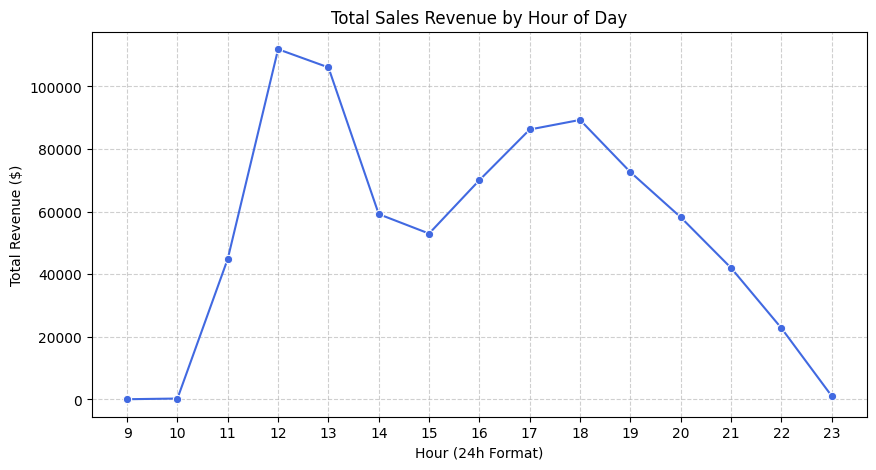

In [24]:

# --- GRAPH 1: Peak Hours of Sales ---
plt.figure(figsize=(10, 5))
hourly_sales = df.groupby('hour')['total_price'].sum().reset_index()
sns.lineplot(data=hourly_sales, x='hour', y='total_price', marker='o', color='royalblue')
plt.title('Total Sales Revenue by Hour of Day')
plt.xlabel('Hour (24h Format)')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(9, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-1220517909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_sales, x='day_of_week', y='total_price', palette='viridis')


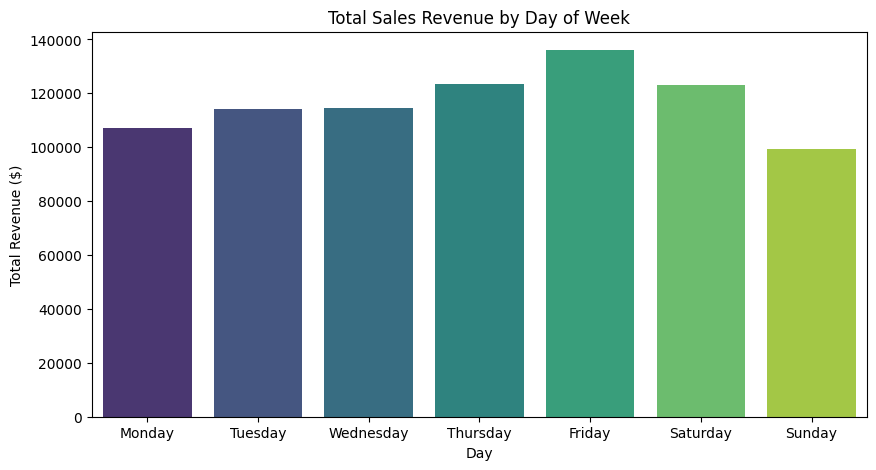

In [25]:

# --- GRAPH 2: Sales by Day of the Week ---
plt.figure(figsize=(10, 5))
daily_sales = df.groupby('day_of_week')['total_price'].sum().reindex(day_order).reset_index()
sns.barplot(data=daily_sales, x='day_of_week', y='total_price', palette='viridis')
plt.title('Total Sales Revenue by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Revenue ($)')
plt.show()

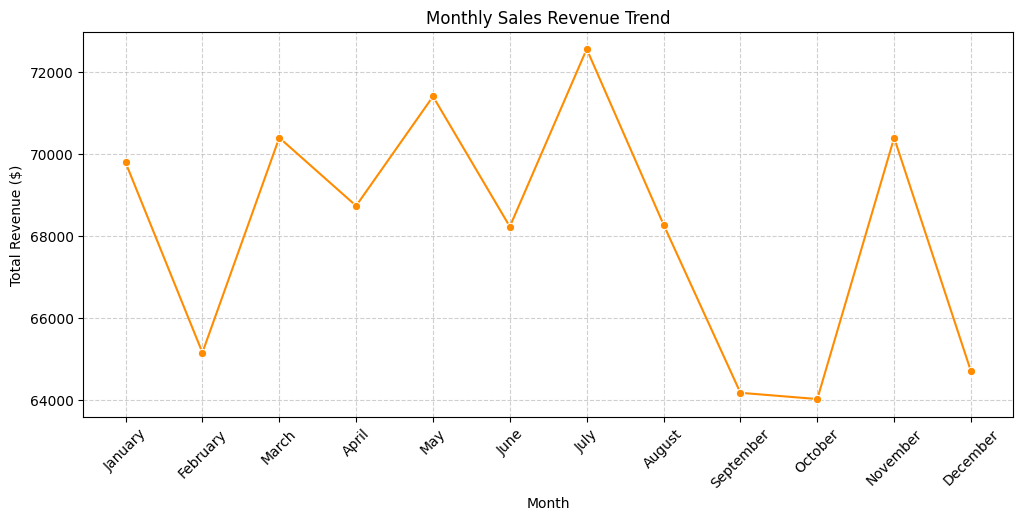

In [26]:

# --- GRAPH 3: Monthly Sales Trend ---
plt.figure(figsize=(12, 5))
monthly_sales = df.groupby('month')['total_price'].sum().reindex(month_order).reset_index()
sns.lineplot(data=monthly_sales, x='month', y='total_price', marker='o', color='darkorange')
plt.title('Monthly Sales Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-1497010235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_qty, x='quantity', y='name', palette='magma')


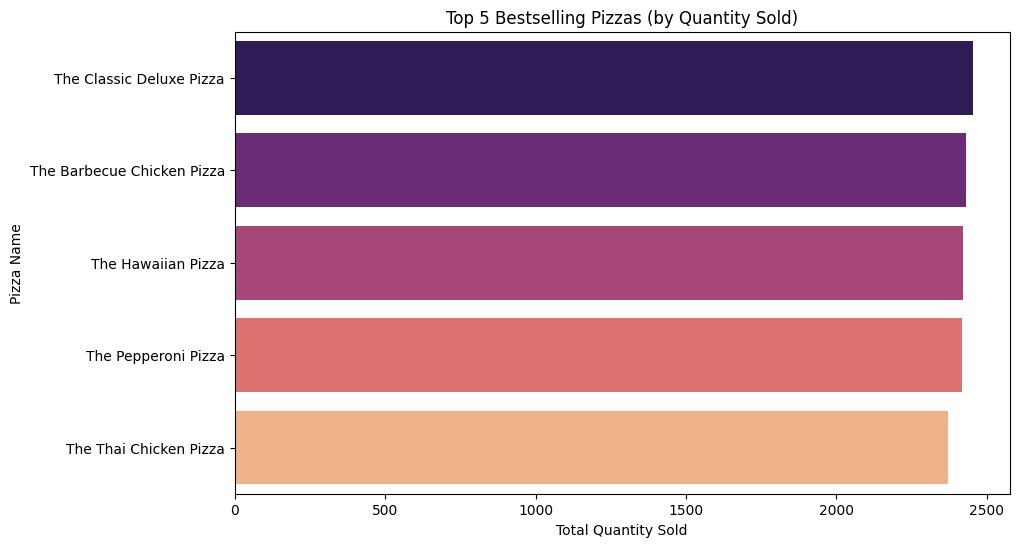

In [27]:

# --- GRAPH 4: Top 5 Bestselling Pizzas ---
plt.figure(figsize=(10, 6))
top_5_qty = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5).reset_index()
sns.barplot(data=top_5_qty, x='quantity', y='name', palette='magma')
plt.title('Top 5 Bestselling Pizzas (by Quantity Sold)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

/tmp/ipython-input-3666636891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5_qty, x='quantity', y='name', palette='Reds_r')


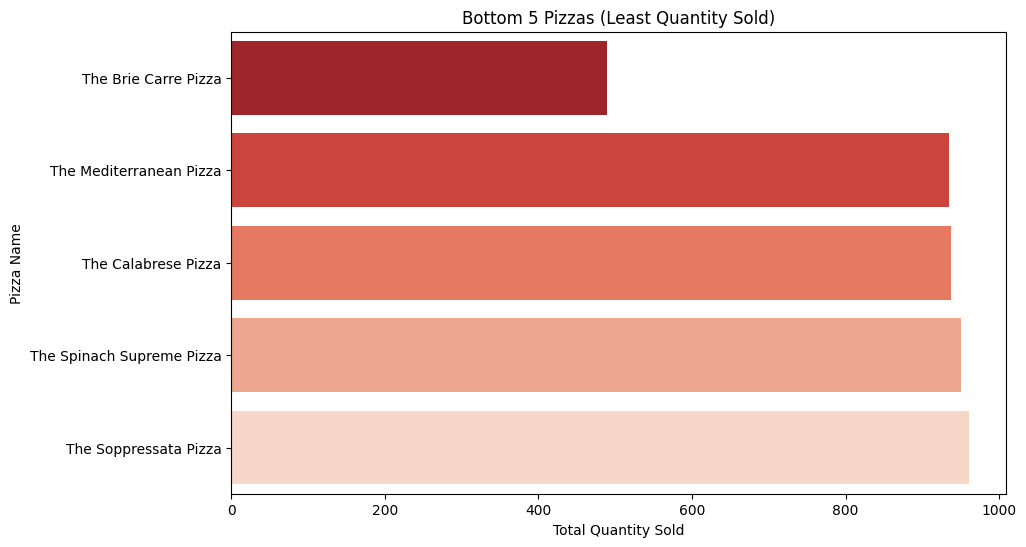

In [28]:

# --- GRAPH 5: Bottom 5 Pizzas (Pizzas not doing well) ---
plt.figure(figsize=(10, 6))
bottom_5_qty = df.groupby('name')['quantity'].sum().sort_values(ascending=True).head(5).reset_index()
sns.barplot(data=bottom_5_qty, x='quantity', y='name', palette='Reds_r')
plt.title('Bottom 5 Pizzas (Least Quantity Sold)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()